<h1> <u>Drought Prediction</u>: Data Wrangling </h1>

<h3> Initial Import of Libraries and Loading of Data </h3>

<b> Import Libraries</b>

In [7]:
# Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<b> Downloading the Soil, Meteorological, and Drought Data and loading them into the file. </b>

Data dictionary and data downloaded from Kaggle on 3/27/2022 at: 
https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data

Preprocessing notebooks to create the Kaggle dataset:
https://github.com/MiniXC/droughted_scripts

In [20]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows 
local_data = '/Users/tanishalohchab/Downloads/drought_prediction-main/dataset/'

# The data is split into four csv files.
# Load all four files
soil_set = pd.read_csv(local_data + 'soil_data.csv')
test_set = pd.read_csv(local_data + 'test_timeseries.csv')
train_set = pd.read_csv(local_data + 'train_timeseries.csv')
validation_set = pd.read_csv(local_data + 'validation_timeseries.csv')

### Information summary of loaded data.

<b> Data type information in the four files. </b>

In [21]:
soil_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 364.0+ MB


In [23]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [24]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268840 entries, 0 to 2268839
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 363.5+ MB


In [30]:
# Convert date column from object to datetime for training, validation, and test set
train_set['date'] = pd.to_datetime(train_set['date'], errors='coerce')
validation_set['date'] = pd.to_datetime(validation_set['date'], errors='coerce')
test_set['date'] = pd.to_datetime(test_set['date'], errors='coerce')


In [33]:
# Date range for training, validation, and test set
print(train_set.date.describe(), '\n')
print(validation_set.date.describe(), '\n')
print(test_set.date.describe(), '\n')


count                         19300680
mean     2008-07-01 11:59:59.999999744
min                2000-01-01 00:00:00
25%                2004-04-01 00:00:00
50%                2008-07-01 12:00:00
75%                2012-10-01 00:00:00
max                2016-12-31 00:00:00
Name: date, dtype: object 

count                2268840
mean     2017-12-31 12:00:00
min      2017-01-01 00:00:00
25%      2017-07-02 00:00:00
50%      2017-12-31 12:00:00
75%      2018-07-02 00:00:00
max      2018-12-31 00:00:00
Name: date, dtype: object 

count                          2271948
mean     2019-12-31 23:59:59.999999232
min                2019-01-01 00:00:00
25%                2019-07-02 00:00:00
50%                2020-01-01 00:00:00
75%                2020-07-02 00:00:00
max                2020-12-31 00:00:00
Name: date, dtype: object 



In [34]:
print('Training Set date range: ', (train_set.date.min(), train_set.date.max()), '\n')
print('Validation Set date range: ', (validation_set.date.min(), validation_set.date.max()), '\n')
print('Test Set date range: ', (test_set.date.min(), test_set.date.max()))

Training Set date range:  (Timestamp('2000-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00')) 

Validation Set date range:  (Timestamp('2017-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00')) 

Test Set date range:  (Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))


#### The actual date range of your dataset does not match what was originally expected or documented in the metadata. However, since the different subsets (training, validation, and test) do not share overlapping dates, there is no risk of data leakage.



| Data Set | Date Range |
| -: | :- |
| Training Set | 2000 - 2016 |
| Validation Set | 2017 - 2018 |
| Test  Set | 2019 - 2020 |

##### Let's look at the values in the datasets that we have.|


In [35]:
soil_set.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [36]:
train_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [37]:
validation_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,...,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,...,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,...,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,...,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [38]:
test_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


<b><u>Field for Drought Score Category</u>: The Drought Score in the None, D0, D1, D2, D3, and D4 categories is the score field.  While the weather factors are assessed everyday, the Drought Score is only assessed once a week.  Due to its weekly evaluation, the NaN score represents daily meteorological scores that do not immediately correlate with the drought score.

 The dates covered by all three data sets are identical. This contradicts the Kaggle website's metadata, which said that the test set was from 2012 to 2020, the validation set was from 2010 to 2011, and the training set was from 2000 to 2009.   According to an examination of the raw CSV data, the test set seems to begin in 2019, the validation set in 2017, and the training set in 2000.   It looks like there is a problem importing the CSV file into the Pandas dataframe.

<h3>Characterizing Null Values within the Dataset</h3>

In [39]:
# SOIL_SET Null Value exploration
missing_soil = pd.concat([soil_set.isnull().sum(), 100 * soil_set.isnull().mean()], axis=1)
missing_soil.columns=['count', '%']
missing_soil.sort_values(by='count', ascending=False)

,count,%
fips,0,0.0
lat,0,0.0
SQ6,0,0.0
SQ5,0,0.0
SQ4,0,0.0
SQ3,0,0.0
SQ2,0,0.0
SQ1,0,0.0
CULT_LAND,0,0.0
CULTIR_LAND,0,0.0


In [40]:
# TRAIN_SET Null Value exploration
missing_train = pd.concat([train_set.isnull().sum(), 100 * train_set.isnull().mean()], axis=1)
missing_train.columns=['count', '%']
missing_train.sort_values(by='count', ascending=False)

,count,%
score,16543884,85.716586
TS,0,0.000000
WS50M_RANGE,0,0.000000
WS50M_MIN,0,0.000000
WS50M_MAX,0,0.000000
WS50M,0,0.000000
WS10M_RANGE,0,0.000000
WS10M_MIN,0,0.000000
WS10M_MAX,0,0.000000
WS10M,0,0.000000


In [41]:
# VALIDATION_SET Null Value exploration
missing_valid = pd.concat([validation_set.isnull().sum(), 100 * validation_set.isnull().mean()], axis=1)
missing_valid.columns=['count', '%']
missing_train.sort_values(by='count', ascending=False)

,count,%
score,16543884,85.716586
TS,0,0.000000
WS50M_RANGE,0,0.000000
WS50M_MIN,0,0.000000
WS50M_MAX,0,0.000000
WS50M,0,0.000000
WS10M_RANGE,0,0.000000
WS10M_MIN,0,0.000000
WS10M_MAX,0,0.000000
WS10M,0,0.000000


In [42]:
# TEST_SET Null Value exploration
missing_test = pd.concat([test_set.isnull().sum(), 100 * test_set.isnull().mean()], axis=1)
missing_test.columns=['count', '%']
missing_test.sort_values(by='count', ascending=False)

,count,%
score,1945608,85.636115
TS,0,0.000000
WS50M_RANGE,0,0.000000
WS50M_MIN,0,0.000000
WS50M_MAX,0,0.000000
WS50M,0,0.000000
WS10M_RANGE,0,0.000000
WS10M_MIN,0,0.000000
WS10M_MAX,0,0.000000
WS10M,0,0.000000


<b> Null Value Synopsis:</b> This clean dataset comes from Kaggle.  The weekly drought assessment and the daily meteorological values have different frequencies, which is why there are score field NaN values.
Because of the way the data is integrated, six of the seven days will be null.  6/7 is 85.71%.

<h3> Numeric Features of the Datasets </h3>

In [43]:
# Numerical features of the soil dataset.
soil_set.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3109.0,30678.538437,14986.018730,1001.000000,19045.000000,29213.000000,46009.000000,56045.000000
lat,3109.0,38.280052,4.838634,25.601043,34.686818,38.328061,41.703590,48.842653
lon,3109.0,-91.659790,11.485291,-124.211407,-98.046842,-90.181170,-83.373303,-67.609354
elevation,3109.0,427.624638,500.158880,-1.000000,132.000000,272.000000,483.000000,3561.000000
slope1,3109.0,0.054973,0.089873,0.000000,0.008300,0.028300,0.068500,0.974000
slope2,3109.0,0.297750,0.215950,0.000000,0.105100,0.271000,0.477500,0.759900
slope3,3109.0,0.319991,0.167727,0.000000,0.185800,0.347100,0.459300,0.696900
slope4,3109.0,0.155878,0.128400,0.000000,0.040800,0.127500,0.255200,0.571700
slope5,3109.0,0.053409,0.073107,0.000000,0.000500,0.012200,0.090300,0.330000
slope6,3109.0,0.065323,0.125526,0.000000,0.000000,0.000700,0.054100,0.606800


In [44]:
# Numerical features of the training dataset.
train_set.describe().T

,count,mean,min,25%,50%,75%,max,std
fips,19300680.0,30670.37677,1001.0,19044.5,29212.0,46007.5,56043.0,14979.107776
date,19300680,2008-07-01 11:59:59.999999744,2000-01-01 00:00:00,2004-04-01 00:00:00,2008-07-01 12:00:00,2012-10-01 00:00:00,2016-12-31 00:00:00,NaN
PRECTOT,19300680.0,2.644145,0.0,0.0,0.18,2.16,234.59,6.226305
PS,19300680.0,96.655785,66.12,95.84,98.3,99.96,104.32,5.447994
QV2M,19300680.0,7.816178,0.12,3.78,6.84,11.35,22.92,4.694305
T2M,19300680.0,12.801455,-37.34,4.45,14.02,21.88,41.39,10.92674
T2MDEW,19300680.0,6.951072,-37.7,-0.96,7.57,15.52,27.55,10.145507
T2MWET,19300680.0,6.986916,-37.46,-0.92,7.58,15.52,27.55,10.09116
T2M_MAX,19300680.0,18.681408,-32.2,10.27,20.4,27.87,49.91,11.544871
T2M_MIN,19300680.0,7.411665,-45.96,-0.7,8.03,16.14,33.8,10.576797


In [45]:
# Numerical features of the validation dataset.
validation_set.describe().T

,count,mean,min,25%,50%,75%,max,std
fips,2268840.0,30670.37677,1001.0,19044.5,29212.0,46007.5,56043.0,14979.110689
date,2268840,2017-12-31 12:00:00,2017-01-01 00:00:00,2017-07-02 00:00:00,2017-12-31 12:00:00,2018-07-02 00:00:00,2018-12-31 00:00:00,NaN
PRECTOT,2268840.0,2.945218,0.0,0.0,0.19,2.5,243.32,6.883588
PS,2268840.0,96.682894,66.86,95.88,98.32,99.98,104.06,5.443892
QV2M,2268840.0,8.209934,0.16,3.92,7.26,12.18,21.98,4.905189
T2M,2268840.0,13.136803,-33.29,4.67,14.58,22.51,40.62,10.935752
T2MDEW,2268840.0,7.626656,-37.01,-0.44,8.51,16.71,26.84,10.497402
T2MWET,2268840.0,7.631953,-33.58,-0.48,8.42,16.65,26.84,10.356828
T2M_MAX,2268840.0,18.847392,-28.59,10.35,20.81,28.24,50.03,11.51619
T2M_MIN,2268840.0,7.903998,-38.15,-0.44,8.67,17.01,33.04,10.647081


In [46]:
# Numerical features of the test dataset.
test_set.describe().T

,count,mean,min,25%,50%,75%,max,std
fips,2271948.0,30670.37677,1001.0,19044.5,29212.0,46007.5,56043.0,14979.110684
date,2271948,2019-12-31 23:59:59.999999232,2019-01-01 00:00:00,2019-07-02 00:00:00,2020-01-01 00:00:00,2020-07-02 00:00:00,2020-12-31 00:00:00,NaN
PRECTOT,2271948.0,2.938845,0.0,0.0,0.21,2.54,249.34,6.719112
PS,2271948.0,96.661749,66.75,95.86,98.3,99.96,103.88,5.443289
QV2M,2271948.0,8.223259,0.1,3.96,7.06,12.22,22.52,4.925266
T2M,2271948.0,12.945749,-38.57,4.53,13.89,22.23,40.33,10.859401
T2MDEW,2271948.0,7.782536,-41.54,-0.16,8.25,16.85,27.05,10.333155
T2MWET,2271948.0,7.793077,-38.59,-0.11,8.09,16.71,27.0,10.104503
T2M_MAX,2271948.0,18.612241,-31.33,10.18,20.14,27.87,48.3,11.403874
T2M_MIN,2271948.0,7.737146,-45.46,-0.5,8.08,16.8,32.32,10.632098


### Exploring the NaN values in the Drought Score ['score'] field:

In [47]:
# Exploring the NaN values in the score field of the training dataset.
train_set[['fips', 'date', 'score']].head(30)

,fips,date,score
0,1001,2000-01-01,NaN
1,1001,2000-01-02,NaN
2,1001,2000-01-03,NaN
3,1001,2000-01-04,1.0
4,1001,2000-01-05,NaN
5,1001,2000-01-06,NaN
6,1001,2000-01-07,NaN
7,1001,2000-01-08,NaN
8,1001,2000-01-09,NaN
9,1001,2000-01-10,NaN


In [48]:
# There are six categories for drought.  No drought is encoded as 'None'
train_set[train_set['score'] == 'None']

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score


Either the 'None' values in this dataset are encoded with the same NaN value as all the non-drought scored days, or there are no values in this dataset linked with 'None' on the Drought Scale.  <br> 
Tuesday, January 4, 2000, is the first non-null drought score, and it repeats every seven days after that.   Every Tuesday, I have to get data from the dataset and create statistics on the drought score based on that subset of data.  <br>
Examine whether 0 rather than NaN can be used to denote No Data in datasets.


In [49]:
# Determining Day of the Week in the Training Dataset

train_set['date'] = pd.to_datetime(train_set['date'])
train_set['day_of_week'] = train_set['date'].dt.day_name()
train_set[['fips', 'date', 'day_of_week', 'score']].head(10)

,fips,date,day_of_week,score
0,1001,2000-01-01,Saturday,NaN
1,1001,2000-01-02,Sunday,NaN
2,1001,2000-01-03,Monday,NaN
3,1001,2000-01-04,Tuesday,1.0
4,1001,2000-01-05,Wednesday,NaN
5,1001,2000-01-06,Thursday,NaN
6,1001,2000-01-07,Friday,NaN
7,1001,2000-01-08,Saturday,NaN
8,1001,2000-01-09,Sunday,NaN
9,1001,2000-01-10,Monday,NaN


In [50]:
train_set_Score = train_set[train_set['day_of_week'] == 'Tuesday']
train_set_Score.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,day_of_week
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0,Tuesday
10,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,...,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0,Tuesday
17,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,...,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0,Tuesday
24,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,...,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0,Tuesday
31,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,...,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0,Tuesday


In [51]:
# TRAIN_SET_SCORE Null Value exploration when there should be a value for Drought Score
missing_train_Score = pd.concat([train_set_Score.isnull().sum(), 100 * train_set_Score.isnull().mean()], axis=1)
missing_train_Score.columns=['count', '%']
missing_train_Score.sort_values(by='count', ascending=False)

,count,%
fips,0,0.0
date,0,0.0
score,0,0.0
WS50M_RANGE,0,0.0
WS50M_MIN,0,0.0
WS50M_MAX,0,0.0
WS50M,0,0.0
WS10M_RANGE,0,0.0
WS10M_MIN,0,0.0
WS10M_MAX,0,0.0


There are no NaN or null values for score from the Tuesday subset.

In [52]:
# Numerical features of the training dataset with DROUGHT SCORE non-null.
train_set_Score.describe().T

,count,mean,min,25%,50%,75%,max,std
fips,2756796.0,30670.37677,1001.0,19044.5,29212.0,46007.5,56043.0,14979.110105
date,2756796,2008-07-01 00:00:00.000000256,2000-01-04 00:00:00,2004-03-30 00:00:00,2008-07-01 00:00:00,2012-10-02 00:00:00,2016-12-27 00:00:00,NaN
PRECTOT,2756796.0,2.714566,0.0,0.0,0.19,2.26,168.69,6.24759
PS,2756796.0,96.647365,66.49,95.83,98.28,99.94,103.76,5.444698
QV2M,2756796.0,7.87577,0.14,3.81,6.94,11.45,22.12,4.721459
T2M,2756796.0,12.89923,-35.44,4.58,14.21,22.0,39.33,10.970402
T2MDEW,2756796.0,7.04935,-35.44,-0.88,7.81,15.67,26.87,10.19765
T2MWET,2756796.0,7.084938,-35.46,-0.84,7.81,15.67,26.87,10.143641
T2M_MAX,2756796.0,18.76711,-30.03,10.36,20.62,27.97,47.75,11.602952
T2M_MIN,2756796.0,7.519916,-40.85,-0.57,8.26,16.28,32.28,10.618183


The count for score is the same as for the entire training dataset.

In [53]:
#### How many unique counties are in the full training dataset?
ts_fips_unique = train_set['fips'].unique()
type(ts_fips_unique)

numpy.ndarray

In [54]:
train_set.fips.value_counts().head()

fips
1001     6210
39159    6210
39115    6210
39117    6210
39119    6210
Name: count, dtype: int64

In [55]:
ts_fips_unique

array([ 1001,  1003,  1005, ..., 56039, 56041, 56043])

In [56]:
ts_fips_count_unique = 0
for i in ts_fips_unique:
    ts_fips_count_unique += 1
ts_fips_count_unique

3108

<b> Training Set is county data from 2000-2009.  There are 3108 unique counties in the dataset. </b>

In [57]:
# Determing character and composition of the Drought Score field
train_set_Score[['fips', 'date', 'score']].head(30)

,fips,date,score
3,1001,2000-01-04,1.0000
10,1001,2000-01-11,2.0000
17,1001,2000-01-18,2.0000
24,1001,2000-01-25,2.0000
31,1001,2000-02-01,1.0000
38,1001,2000-02-08,1.0000
45,1001,2000-02-15,1.0000
52,1001,2000-02-22,1.0000
59,1001,2000-02-29,1.0000
66,1001,2000-03-07,1.0000


### Histogram of Drought Severity within the Training Dataset.

<Axes: >

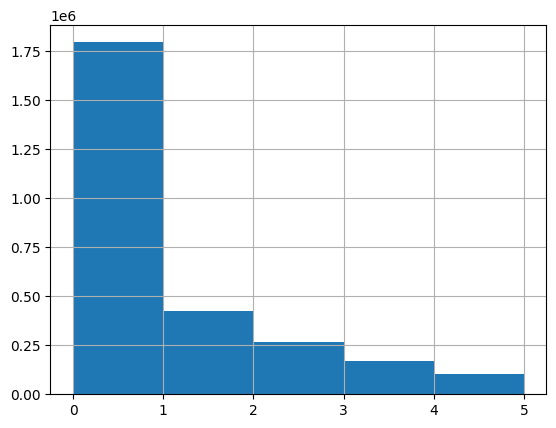

In [58]:
#A histogram detailing the distribution of drought severity within the training dataset.
train_set_Score['score'].hist(bins=5)

<b> The dataset does not contain data from times when there is no drought or a drought score of 'None' or 'No Data'.  The dataset only contains information for when there was some level of drought occuring. </b>

## Summary of Initial Data Wrangling

* The meteorological data is over 3GBs and are daily measurements spanning 2 decades.  This may exceed my current processing power.  I am installing a Linux/Windows dual-boot system for my desktop to help alleviate processing issues.  Alternatively, the daily meteorological measurements may be condensed into a weekly statistic to correspond with the weekly drought score. <br>
<br>
* The weekly drought score was originally an integer or category: None, D0, D1, D2, D3, D4, & NoData. See the Data Dictionary for descriptions of the categorical degrees of drought.<br>

| Category | Drought Score |
| -: | :- |
| None | 0 |
| D0 | 1 |
| D1 | 2 |
| D2 | 3 |
| D3 | 4 |
| D4 | 5 |


* A linear regression should be explored with the floating point drought score.  But the next step beyond that is to convert the floating point numbers that are in the score column back to categorical values to correspond with None, D0, D1, D2, D3, & D4.<br>
<br>
* The discussion on how the continuous score values were calculated from categorical values is here:<br>
https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data/discussion/299527 <br>
The counties were given a percentage of how much of each county was in which drought state and then those floating point numbers were interpolated based on the location of the meteorological data.  The GitHub repo showing the preprocessing is here:<br> https://github.com/MiniXC/droughted_scripts <br>
<br>
* The date ranges for the Training, Validation, and Test Sets do not correspond with the metadata, but there is still no overlap and there is not any concern about data leakage.  The date ranges are: <br>

| Data Set | Date Range |
| -: | :- |
| Training Set | 2000 - 2016 |
| Validation Set | 2017 - 2018 |
| Test  Set | 2019 - 2020 |

<br>
* There are no issues in the dataset associated with missing data.  The dataset does not contain null values or instances of NoData. <br>